In [3]:
# 1) For the data in the attached file (univariate_linear_regression.csv), (a) do the linear regression (best line fit) using steepest gradient descent with line (univariate) search. (b) Plot the best fit line, cost function as well as the contour plot of the cost function.


# (a)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


data = pd.read_csv('univariate_linear_regression.csv')



In [4]:
# pre-processing data from csv file

X= data.iloc[:,0]

Y= data.iloc[:,1]

In [5]:
# Converting X and Y data to arrays

X= np.array(X)
Y= np.array(Y)

m= len(X) # no.of training sample


In [6]:
# defining the cost function J(w_0,w_1)

def J(w):
    J_cost= (1/(2*m)) * sum((((w[0]+w[1]*X)-Y)**2))
    return J_cost

    
# function for finding J_w0 and J_w1 ( Derivates of cost function w.r.t w_0 and w_1)

def J_w0(w_0,w_1):
    
    J_w0= (1/m) * sum ((w_0+w_1*X)-Y)
    return J_w0

def J_w1(w_0,w_1):
    
    J_w1= (1/m) * sum (((w_0+w_1*X)-Y)*X)
    return J_w1

In [7]:
# function to return steepest gradient descent direction

def minusdelj(w_0,w_1):
    
    s= np.array([-1* (1/m) * sum ((w_0+w_1*X)-Y),-1* (1/m) * sum (((w_0+w_1*X)-Y)*X)])
    return s


# initial weights
w= np.array([0,0])

In [8]:
# cost function in terms of alpha

def Jcost(alpha):
    jn= (1/(2*m)) * sum((((w_0+ alpha*s[0]) + (w_1+ alpha*s[1])*X -Y)**2))
    return jn


# defining a function alpha that returns a bracketed alpha value by exhaustive search method

def alpha(a,b):
    
    
    # use bracketing to bound alpha
    n=10
    delta_alpha= (b-a)/n
    alpha1=a
    alpha2= alpha1+ delta_alpha
    alpha3= alpha2+ delta_alpha
    
    

    while alpha3<b:
        
        
        if Jcost(alpha1)>= Jcost(alpha2) and Jcost(alpha2)<= Jcost(alpha3):
            
            
            break
            
        
    
        else:
            
            alpha1=alpha2
            alpha2=alpha3
            alpha3= alpha2+delta_alpha
            
    return alpha1,alpha3



In [9]:
# defining newton raphson to find critical alpha value

# defining a Jdash function to calculate first derivative of J w.r.t to alpha


def Jdash(alpha,s):
    jdash= (1/(m)) * sum(((w_0+alpha*s[0])+(w_1+alpha*s[1])*X - Y)*(s[0]+s[1]*X))
    return jdash

In [10]:
# defining a Jdoubdash function to calculate second derivative of J w.r.t to alpha

def Jdoubdash(s):
    jdoubdash= (1/(m)) * sum((s[0]+s[1]*X)**2)
    return jdoubdash



The number of training data m is 200




The weights found out using steepest gradient descent using uni-variate search is (-10.015437488404308, 2.9718566456867794)


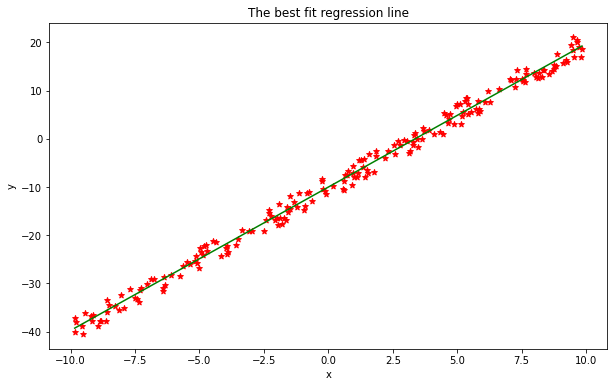

In [11]:
def nwtraph(alpha1,alpha3):
    
    alpha= np.linspace(alpha1,alpha3,20)  # bracketed alpha is used
    alpha1= alpha[0]
    epsilon= 0.001

    J_1_alpha= Jdash(alpha1,s) # first derivative of function J w.r.to alpha
    

    while abs(J_1_alpha)> 0.01:
        
        J_2_alpha= Jdoubdash(s)
        alpha1= alpha1- J_1_alpha/J_2_alpha
        J_1_alpha= Jdash(alpha1,s)
        
       
        
        
    return alpha1



print("\n")

print(f"The number of training data m is {m}")

print("\n")

# let number of iterations , n = 1500
n=1500

# initial starting weights

w= np.array([0,0])
w_0= w[0] 
w_1= w[1]
s= minusdelj(w_0,w_1) # initial search direction

# initial value for line search of alpha
a=-5 
b= 5
for i in range(n):
    
    alphan= alpha(a,b)
    s= minusdelj(w_0,w_1)
    crtalpha= nwtraph(alphan[0],alphan[1])
    a= alphan[0]
    b= alphan[1]
    
    
    
    J_w0= (1/m) * sum ((w_0+w_1*X)-Y)
    J_w1= (1/m) * sum (((w_0+w_1*X)-Y)*X)
    
    
    w_0= w_0 - crtalpha*(J_w0)
    w_1= w_1 - crtalpha*(J_w1)

print("\n")
print(f"The weights found out using steepest gradient descent using uni-variate search is {w_0,w_1}")


# (b) Plot the best fit line, cost function as well as the contour plot of the cost function.

# plotting the best fit line for the data

# plotting the scatter plot

plt.figure(figsize=(10,6))
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(X,Y, marker= "*", color= 'r' )

# plotting the best fit line for the data

# Equation of the line with optimum weights (w_0 and w_1) as the parameter

J_h= w_0+w_1*X 

plt.plot([min(X), max(X)], [min(J_h), max(J_h)], color='green')  # regression line

plt.title("The best fit regression line")

plt.show()


In [12]:
# creating the surface plot for the cost function

m= len(X) # no.of training sample

w0 = np.linspace(-50,50,20)
w1 = np.linspace(-50,50,20)

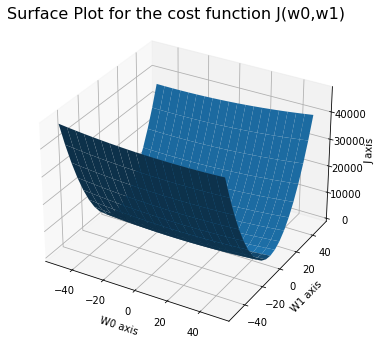

In [13]:
# defining the cost function ,J = 1/2m * sum ((w0+w1*x -y)^2) using a list comprehension

j= (1/(2*m)) * ((m*(w0)**2 +(w1)**2*sum([x**2 for x in X]) +2*w0*w1*sum([x for x in X])-2*w1*sum([t for t in X*Y])-2*w0*sum([y for y in Y])))

W0,W1= np.meshgrid(w0,w1)  # generating W0, W1 grids

J= (1/(2*m)) * ((m*(W0)**2 +(W1)**2*sum([x**2 for x in X]) +2*W0*W1*sum([x for x in X])-2*W1*sum([t for t in X*Y])-2*W0*sum([y for y in Y])))

fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(111, projection='3d')

plt.suptitle("Surface Plot for the cost function J(w0,w1) ",size=16, y=0.9)

ax.plot_surface(W0, W1,J)
ax.set_xlabel('W0 axis')
ax.set_ylabel('W1 axis')
ax.set_zlabel('J axis')

plt.show()        #the surface is plotted.

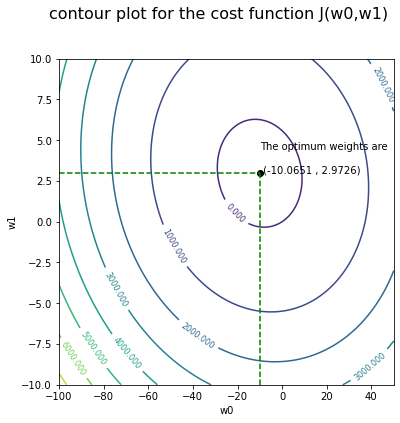

In [14]:
# plotting the contour plot of the cost function

fig = plt.figure(figsize=(6,6))

plt.suptitle("contour plot for the cost function J(w0,w1) ",size=16, y=1)

w0 = np.linspace(-100,50,100)
w1 = np.linspace(-10,10,100)
W0,W1= np.meshgrid(w0,w1)  # generating W0, W1 grids

J1= (1/(2*m)) * ((m*(W0)**2 +(W1)**2*sum([x**2 for x in X]) +2*W0*W1*sum([x for x in X])-2*W1*sum([t for t in X*Y])-2*W0*sum([y for y in Y])))

cp=plt.contour(w0,w1,J1)

plt.xlabel('w0')
plt.ylabel('w1')
plt.clabel(cp, fontsize=8)
plt.plot([w_0], [w_1], 'ko')
plt.text(w_0, w_1, "The optimum weights are \n \n (-10.0651 , 2.9726) ")
plt.plot([-10.0651, -10.0651], [-10, 2.9726], linestyle='dashed',color='green')
plt.plot([-100, -10.0651], [2.9726, 2.9726], linestyle='dashed',color='green')

